In [125]:
#Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import scipy
import statsmodels.formula.api as smf

In [126]:
# Settings
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Import CSV

df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007


In [128]:
#Variables

Title_fontsize= 16

# Data Validation

1) ¿Qué tipo de dato son las variables del conjunto de datos?

2) ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

3) ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

4) ¿Cuál es el ratio de valoes en 0?

5) ¿Cuál es el ratio de valoes únicos?

### Tratamineto de valores nulos
6) ¿Existen valores nulos explícitos en el conjunto de datos?

7) De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?
8) ¿Cuántos valores nulos tenemos en total en el conjunto de datos?
9) ¿Cuál es la proporción de valores nulos por cada variable?
10) ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?
11) ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [129]:
# 1
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [130]:
# 2
(df
 .dtypes
 .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

In [131]:
# 3
print('the dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

the dataset has 344 rows and 8 columns


In [132]:
# 4

def Zerovalues(df):
    d = {'TotalRecord': df.shape[0], '#Zeros':0, '%Zeros':0}
    y = pd.DataFrame(d, index= df.columns)
     
    for c  in df.columns:
         y.loc[c,"#Zeros"] = len(df[df[c]==0])
         y.loc[c,"%Zeros"] = round((y.loc[c,"#Zeros"] / y.loc[c,"TotalRecord"] ),2) * 100
    return y[y["#Zeros"]>0]

In [133]:
#4
Zerovalues(df)

,TotalRecord,#Zeros,%Zeros


In [134]:
print("Conclusion -> There aren't ")

Conclusion -> There aren't 


In [135]:
# 5

def uniqueRate(data,initialColumn):
    
  d = pd.DataFrame(columns=("UniqueValue","UniqueRate"),index=data.columns)
  x = data.columns

  for i in data.columns:
    d.loc[i,"UniqueValue"]=data[i].nunique()
    #print(x[i])

  d["UniqueRate"]= d["UniqueValue"] / data.shape[0]
  d["UniqueRate"] = d["UniqueRate"].astype(float)
  d["UniqueRate"] = round(d["UniqueRate"],3)
  return d.sort_values(by="UniqueValue",ascending=False)

In [136]:
uniqueRate(df,0)

,UniqueValue,UniqueRate
bill_length_mm,164,0.48
body_mass_g,94,0.27
bill_depth_mm,80,0.23
flipper_length_mm,55,0.16
species,3,0.01
island,3,0.01
year,3,0.01
sex,2,0.01


In [137]:
# 6 & 7
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [138]:
def nullValues(dataSet):
    ''' Analize null values '''
    x = dataSet.isna().sum()
    if len(x[x>0])>0:
        d = {'NullRecord': x[x>0], 'TotalRecord': dataSet.shape[0]}
        y = pd.DataFrame(d)
        #y["CompleteRecord"] = y["TotalRecord"] - y["NullRecord"]
        y["Empty %"] = round(y['NullRecord']/y['TotalRecord'],2) 
    return y.sort_values("NullRecord",ascending=True)

In [139]:
nullValues(df)

,NullRecord,TotalRecord,Empty %
bill_length_mm,2,344,0.01
bill_depth_mm,2,344,0.01
flipper_length_mm,2,344,0.01
body_mass_g,2,344,0.01
sex,11,344,0.03


In [140]:
# 8
print('Null Values -> {}'.format(df.isnull().sum().sum()))

Null Values -> 19


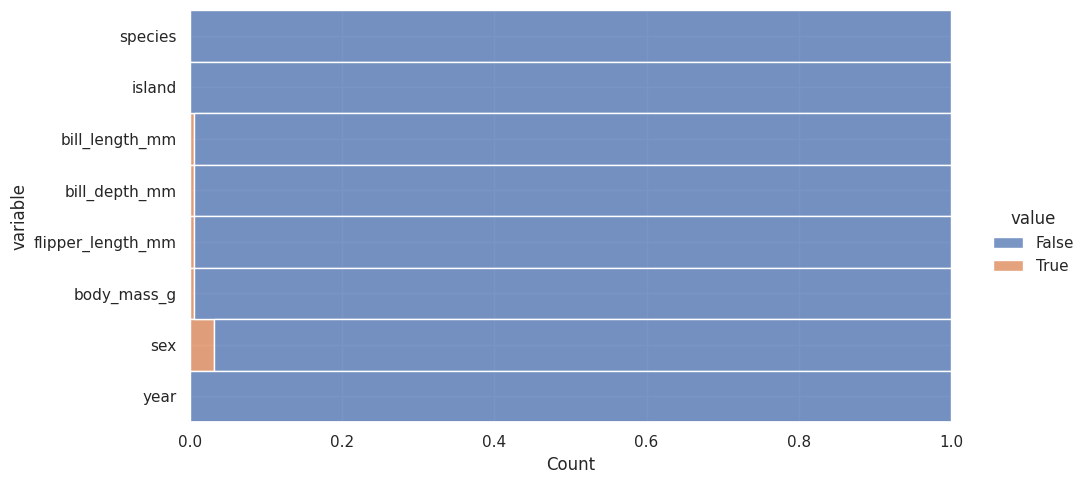

In [141]:
# 9 & 10
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df_null:(sns.displot(
                   data=df_null,
                   y='variable',
                   hue='value',
                   multiple='fill',
                   aspect=2)
                        )
    )
)
plt.show()

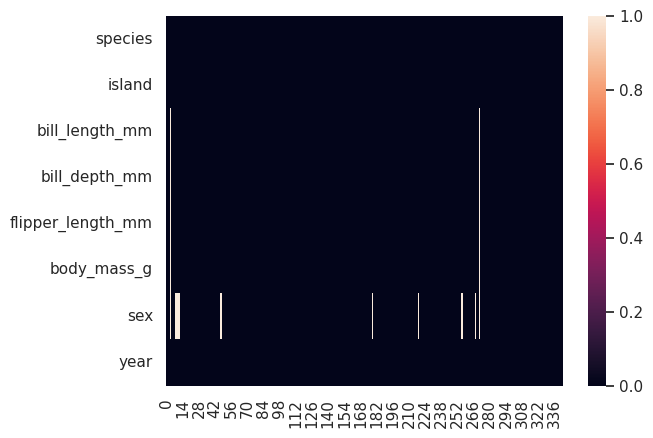

In [142]:
# 10
(   
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df_null:(
            sns.heatmap(
                data=df_null
            )
        )

    )
)
plt.show()

In [143]:
# 12
print('Number of rows removing null records-> {}'.format(df.shape[0]-df.dropna().shape[0]))

Number of rows removing null records-> 11


# Concusion
#### The number of null values wasn't significant so we decided to eliminate them.

In [144]:
sex=df['sex'].value_counts()
shape=df.shape

print(' Total Male -> {} \n Total Female -> {} \n Total "nan" -> {}'.format(sex[0],sex[1],shape[0]-sex[0]-sex[1]))
df=df.dropna()

 Total Male -> 168 
 Total Female -> 165 
 Total "nan" -> 11


## Change variable type

In [145]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [146]:
df = (
    df.astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

In [147]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [148]:
df.describe(include='category').transpose()

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


In [149]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00


## Categorical variables - Analysis

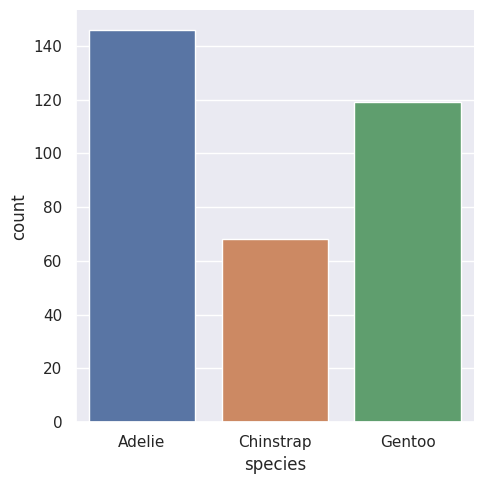

In [150]:
sns.catplot(data=df,
            x='species',
            kind='count'
            )
plt.show()

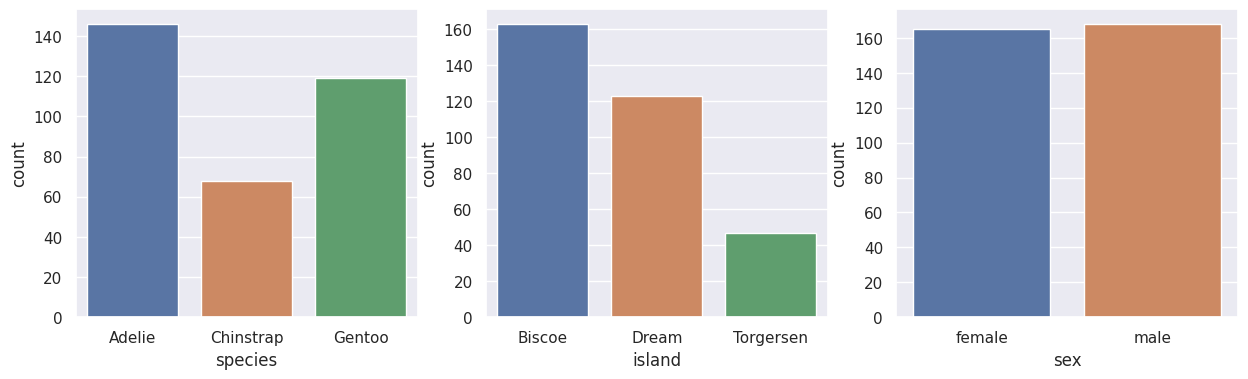

In [151]:
categories=df.select_dtypes('category').columns
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in range(len(categories)):
    (
        df
        .value_counts(categories[i],sort=True)
        .reset_index(name='count')
        .pipe(
            lambda df_count:(
                sns.barplot(
                    ax=ax[i],
                    data=df_count,
                    x = categories[i],
                    y='count'
                )
            )
                
        )
    )

In [152]:
df_categories=df.select_dtypes('category')
categories=df.select_dtypes('category').columns

In [153]:
def pivot_table(data,columns,count):

    for i in columns:
        d = data.pivot_table(index= i, values=count, margins=True,margins_name='Total',aggfunc='count')
        d['%']=d/data.shape[0]
        d['%']=round(d['%'].astype(float),2)
        print(i)
        print('')
        print(d.sort_values(by=count,ascending=True))
        print('\n')

In [154]:
pivot_table(df,categories,'year')

species

           year    %
species             
Chinstrap    68 0.20
Gentoo      119 0.36
Adelie      146 0.44
Total       333 1.00


island

           year    %
island              
Torgersen    47 0.14
Dream       123 0.37
Biscoe      163 0.49
Total       333 1.00


sex

        year    %
sex              
female   165 0.50
male     168 0.50
Total    333 1.00




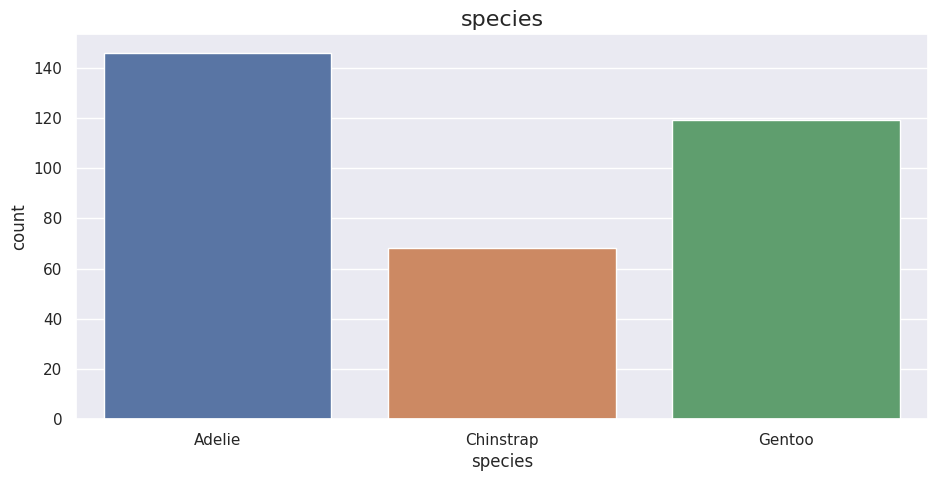

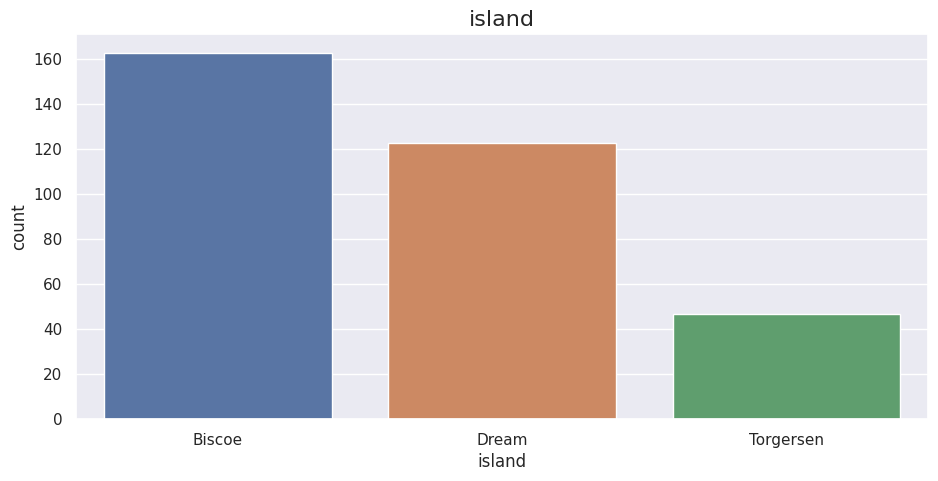

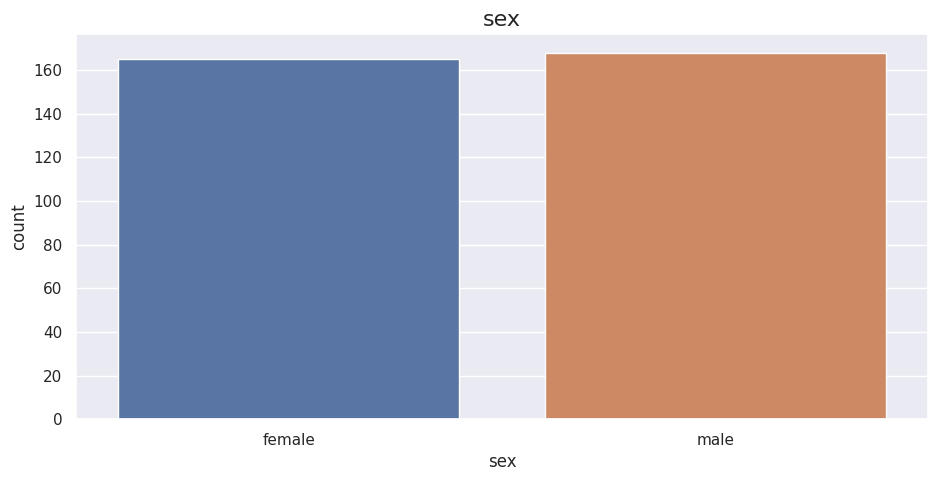

In [155]:
for i in df_categories:
    plt.figure(figsize=(11,5))
    plt.title(i,fontsize=Title_fontsize)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(x=df_categories[i])
    plt.show()

## Measures of central tendency

In [156]:
print('Mean\n')
print(df.mean())
print('\n')
print('Median\n')
print(df.median())
print('\n')
print('Mode\n')
print(df_categories.mode())

Mean

bill_length_mm        43.99
bill_depth_mm         17.16
flipper_length_mm    200.97
body_mass_g         4207.06
year                2008.04
dtype: float64


Median

bill_length_mm        44.50
bill_depth_mm         17.30
flipper_length_mm    197.00
body_mass_g         4050.00
year                2008.00
dtype: float64


Mode

  species  island   sex
0  Adelie  Biscoe  male


In [157]:
df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# measures of dispersion

In [158]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00


In [159]:
df_desc=df.describe().transpose()
df_desc['inter_range'] = df_desc['75%'] - df_desc['25%']
df_desc['range+'] = df_desc['mean'] + df_desc['std']
df_desc['range-'] = df_desc['mean'] - df_desc['std']
df_desc

,count,mean,std,min,25%,50%,75%,max,inter_range,range+,range-
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60,9.10,49.46,38.52
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50,3.10,19.13,15.20
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00,23.00,214.98,186.95
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00,1225.00,5012.27,3401.84
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00,2.00,2008.85,2007.23


In [160]:
numeric_columns = df.select_dtypes(include=np.number).columns[:4]
numeric_columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

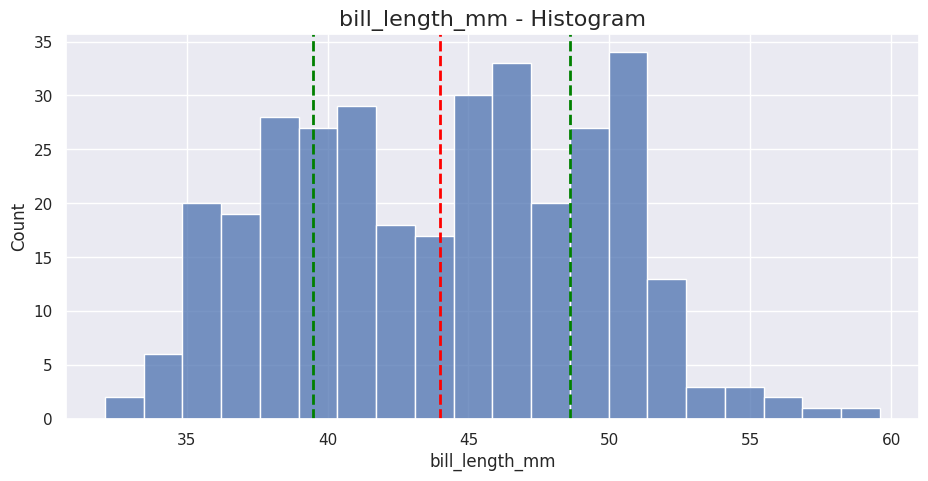

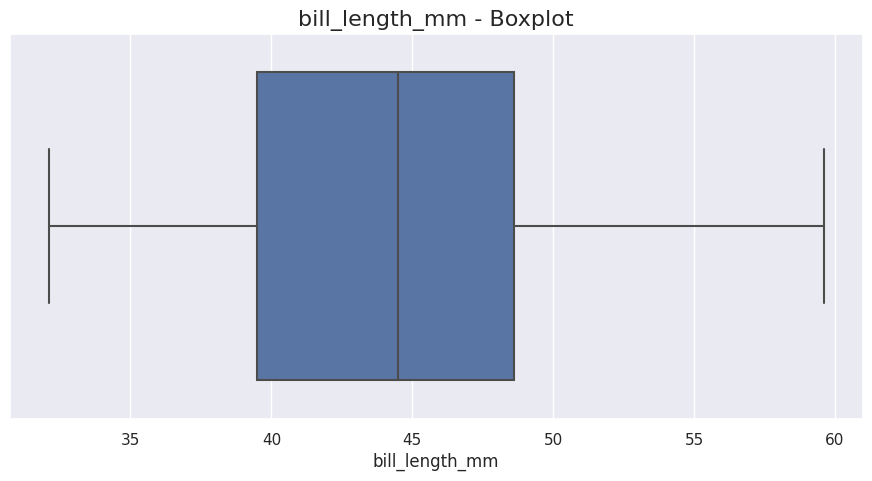

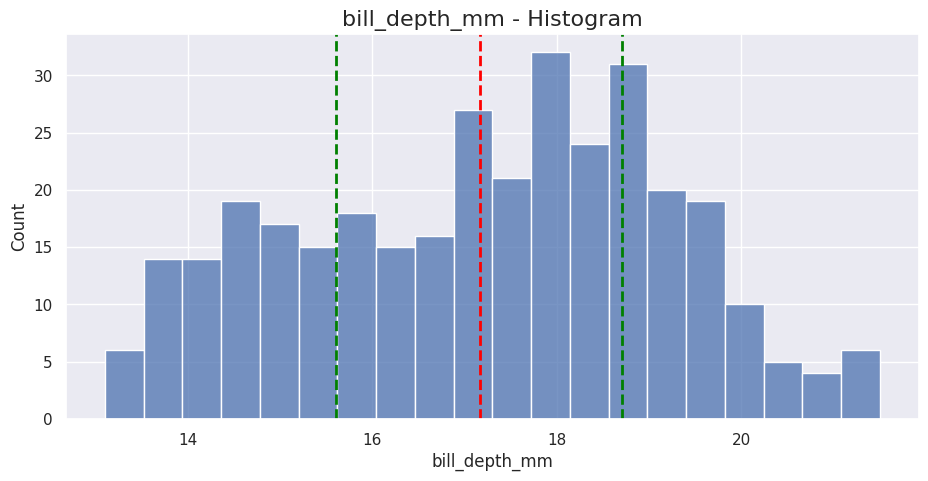

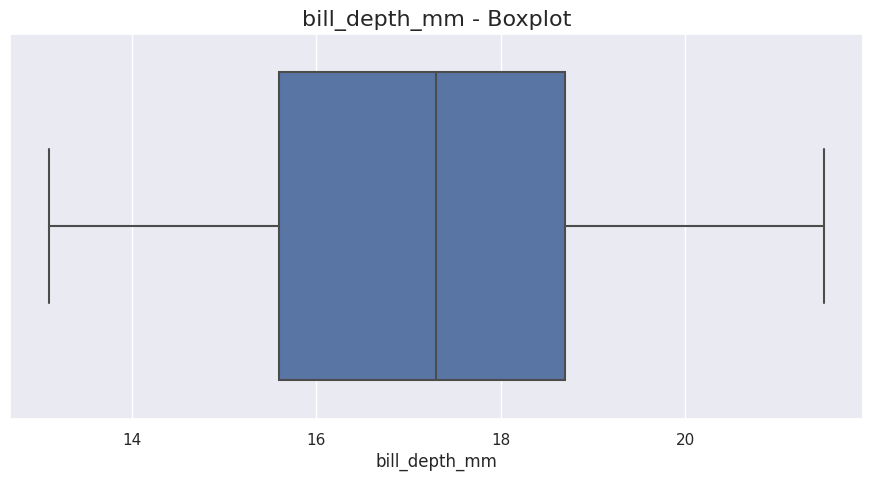

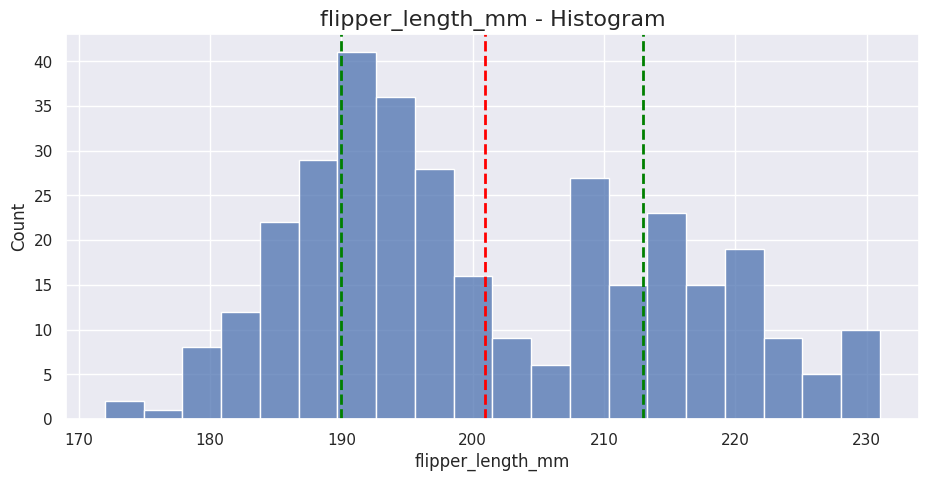

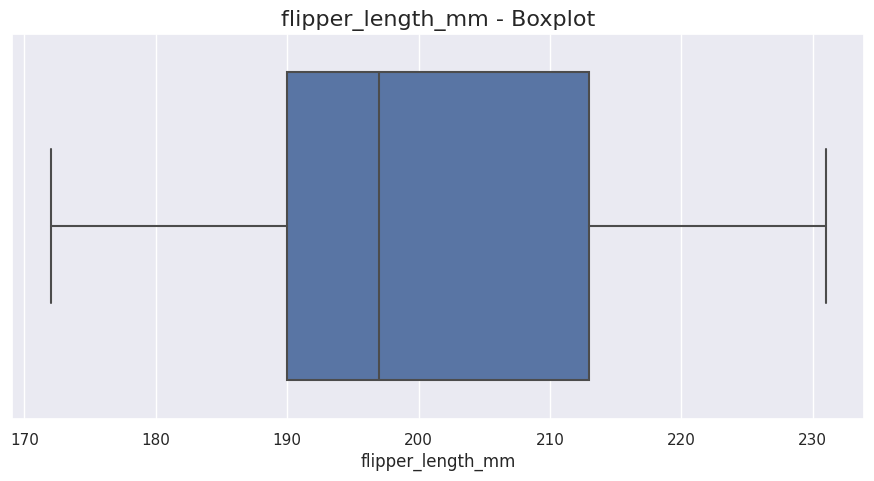

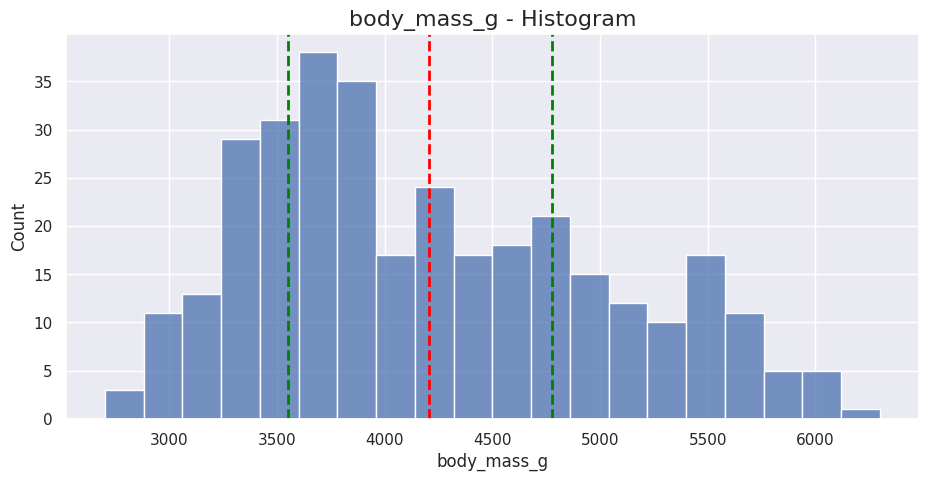

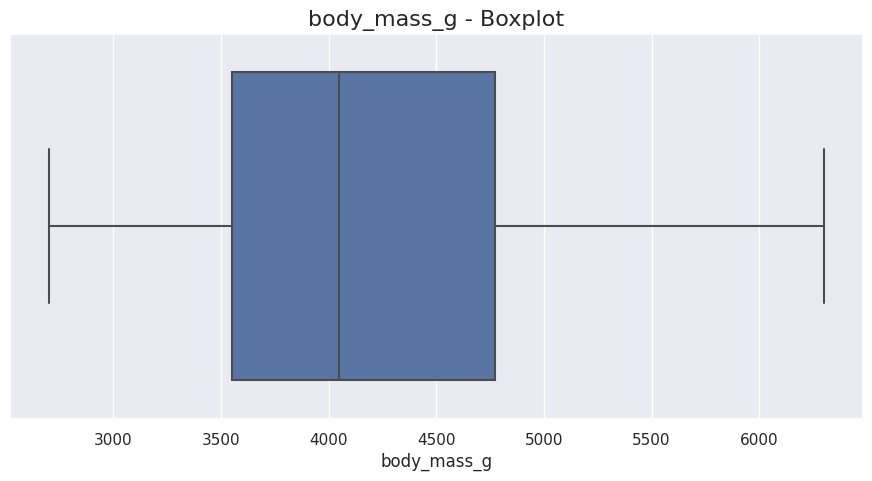

In [161]:
for column in numeric_columns:
    plt.figure(figsize=(11,5))
    sns.histplot(
        data=df,
        x=column,
        bins=20
    )
    plt.axvline(
        x=df[column].mean(),
        color='red',
        linestyle='--',
        linewidth=2)
    plt.axvline(
    x= df[column].quantile(q=0.25),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.axvline(
    x= df[column].quantile(q=0.75),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.title(column+' - Histogram',fontsize=16)
    plt.show()
    plt.figure(figsize=(11,5))
    sns.boxplot(data=df
                ,x=column)
    plt.title(column+' - Boxplot',fontsize=Title_fontsize)
    plt.show()

In [162]:
species = df.species.unique()

adelie_df = df.query("species == 'Adelie'")
gentoo_df = df.query("species == 'Gentoo'")
chinstrap_df = df.query("species == 'Chinstrap'")

list = [adelie_df,gentoo_df,chinstrap_df]

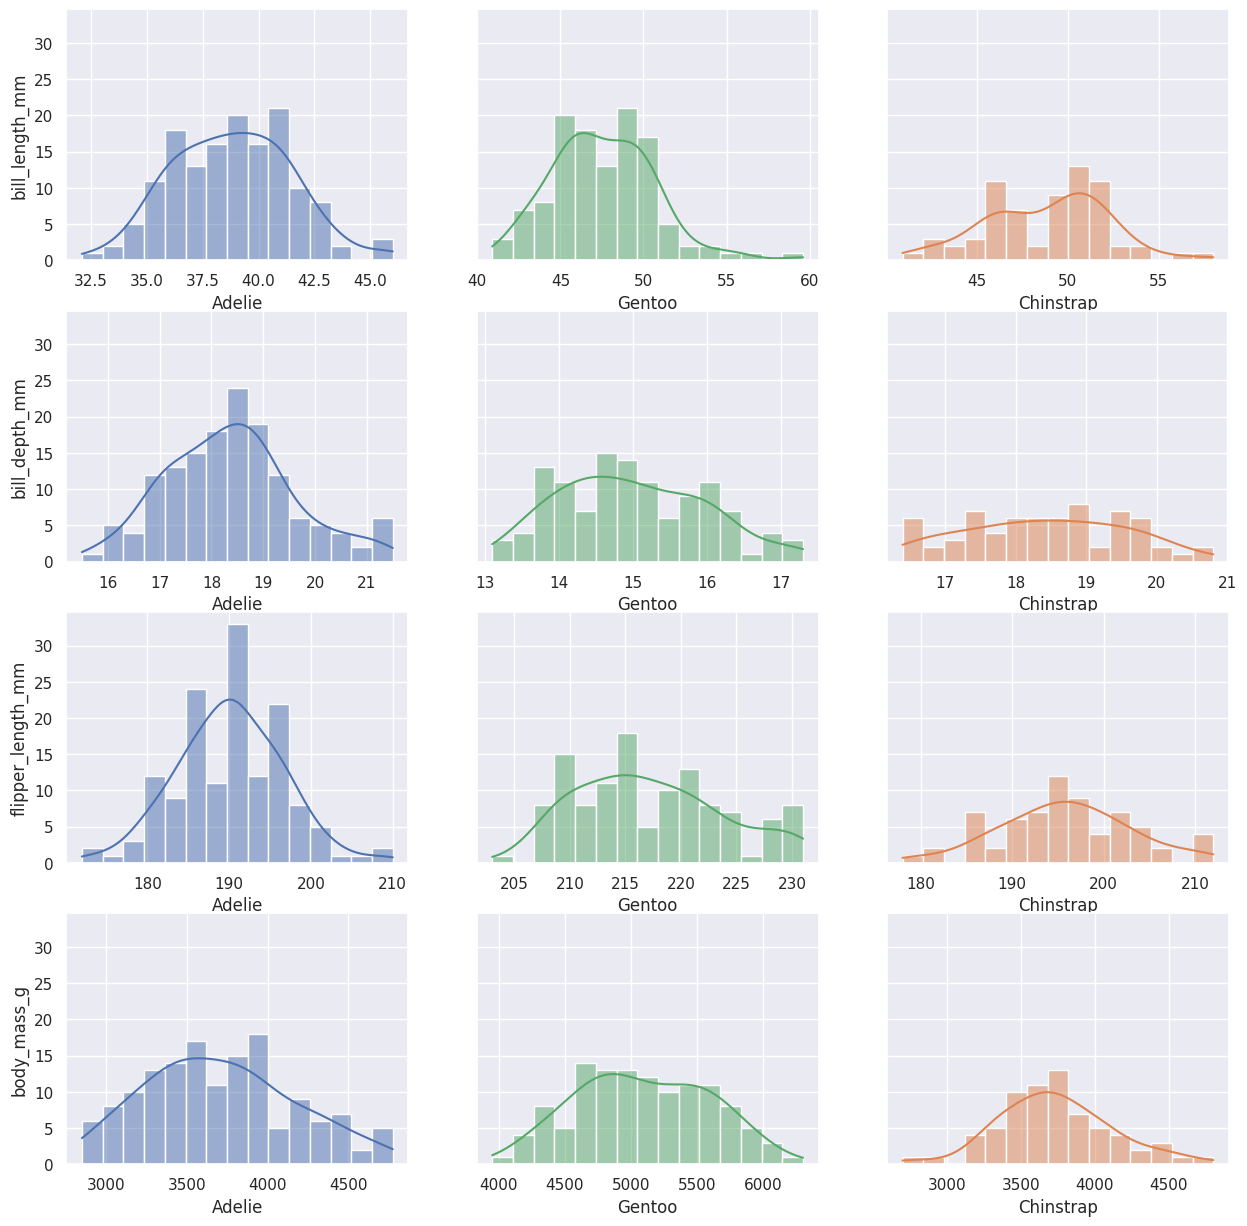

In [163]:
fig,ax = plt.subplots(len(numeric_columns),len(list),sharey=True, figsize=(15,15))

for j in range(len(numeric_columns)):
    for i in range(len(list)):
        sns.histplot( 
            ax=ax[j][i],
            data=list[i],
            x=numeric_columns[j],
            multiple='stack',
            hue='species',
            bins=15,
            kde=True,
            )
        

        ax[j][i].set_ylabel(f'{numeric_columns[j]}')
        ax[j][i].set_xlabel(f'{species[i]}')

        ax[j][i].get_legend().remove()

# Mass Probability Functions

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

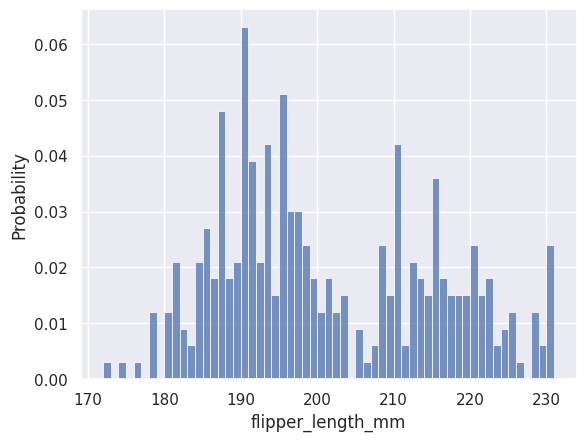

In [164]:
sns.histplot(
    data=df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

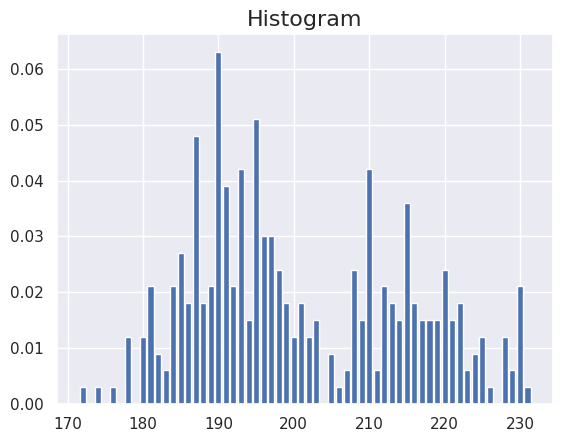

In [165]:
pmf_flipper_lenght = empiricaldist.Pmf.from_seq(
    df.flipper_length_mm,
    normalize=True
)

pmf_flipper_lenght.bar()
plt.title('Histogram',fontsize=Title_fontsize)
plt.show()

In [166]:
print('La probabilidad encontrar un flipper lenght de 200mm en un pringuino es de {}%'.format(round(pmf_flipper_lenght(200)*100,3)))

La probabilidad encontrar un flipper lenght de 200mm en un pringuino es de 1.201%


# Empirical cumulative probability functions

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

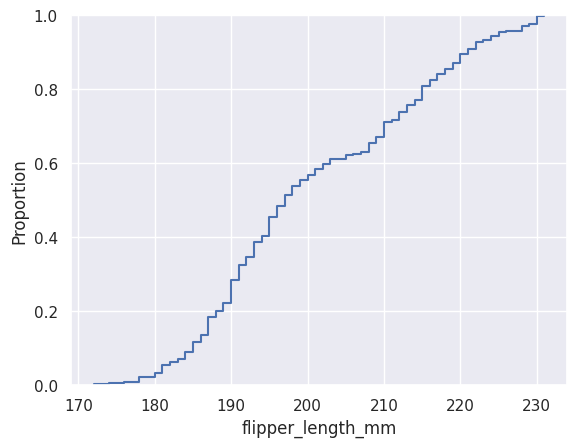

In [167]:
sns.ecdfplot(
    data=df,
    x='flipper_length_mm'
)

In [168]:
cmd_flipper_length=empiricaldist.Cdf.from_seq(
    df.flipper_length_mm,
    normalize=True
)

Text(0.5, 1.0, 'Cummulative function')

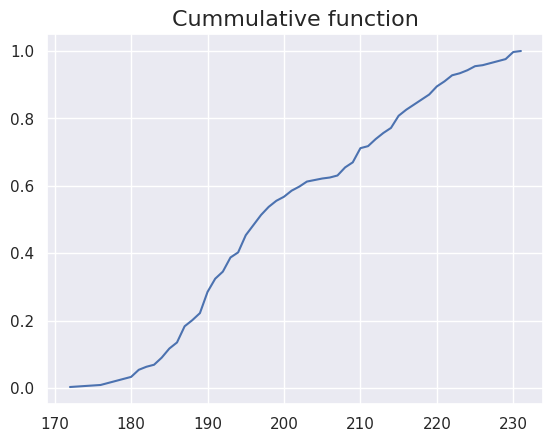

In [169]:
cmd_flipper_length.plot()
plt.title('Cummulative function',fontsize=Title_fontsize)

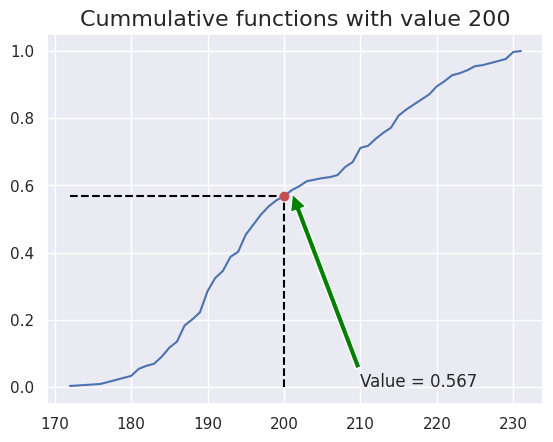

In [170]:
cmd_flipper_length.plot()

q = 200
p = cmd_flipper_length.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)
plt.hlines(
    y=p,
    xmin=cmd_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
plt.annotate(f'Value = {str(p)[:5]}', xy =(201,0.58),
                xytext =(210, 0.0), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.01))

plt.plot(q,p, 'ro')
plt.title('Cummulative functions with value '+str(q),fontsize=Title_fontsize)
plt.show()

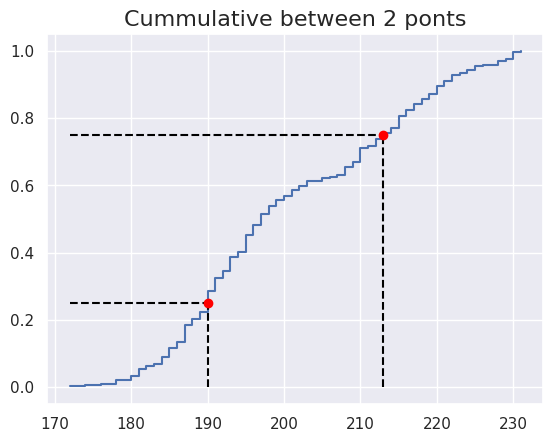

In [171]:
cmd_flipper_length.step()

p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cmd_flipper_length.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=cmd_flipper_length.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)
plt.title('Cummulative between 2 ponts',fontsize=Title_fontsize)
plt.show()

# Probability density functions

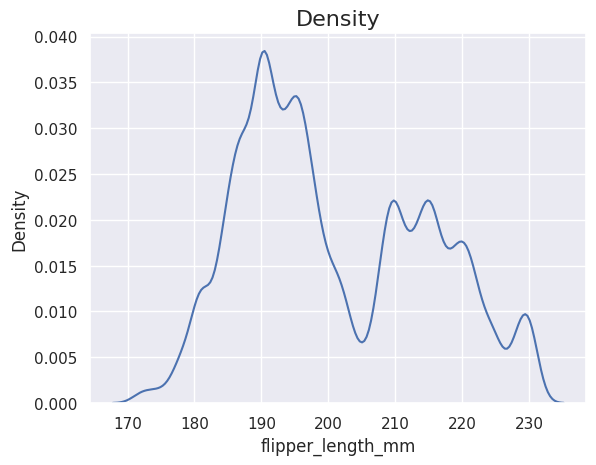

In [172]:
sns.kdeplot(
    data=df,
    x='flipper_length_mm',
    bw_method=0.1
)
plt.title('Density',fontsize=Title_fontsize)
plt.show()

In [173]:
stats = df.body_mass_g.describe()
stats

count    333.00
mean    4207.06
std      805.22
min     2700.00
25%     3550.00
50%     4050.00
75%     4775.00
max     6300.00
Name: body_mass_g, dtype: float64

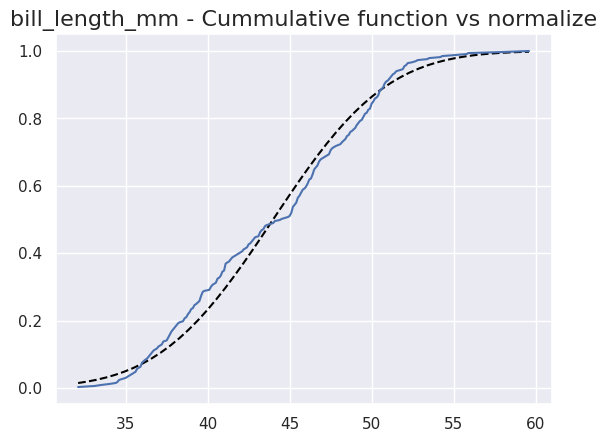

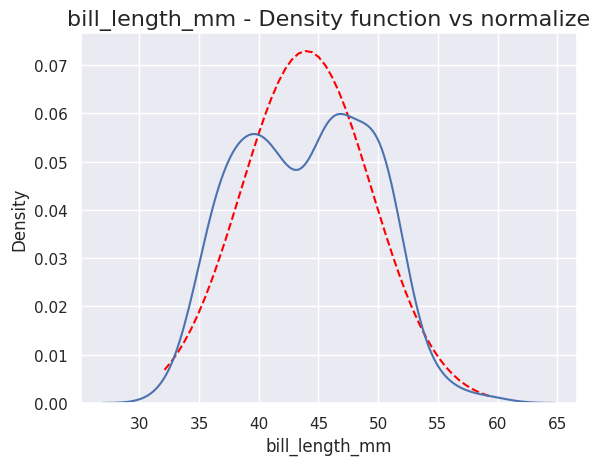

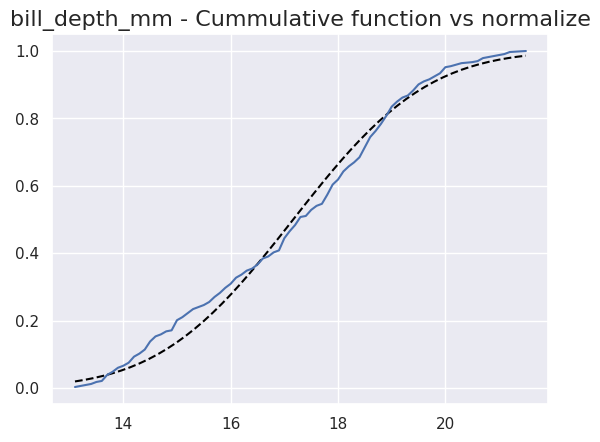

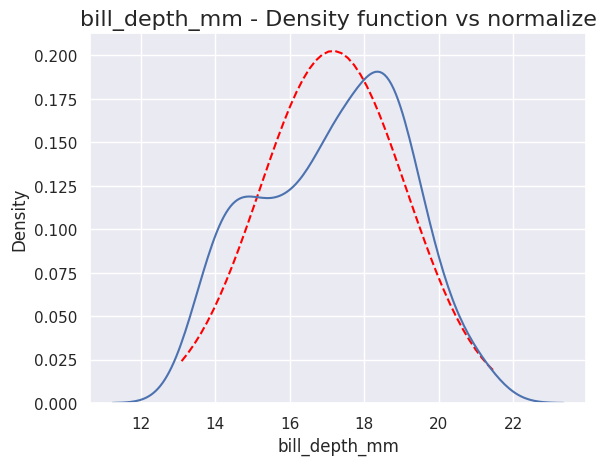

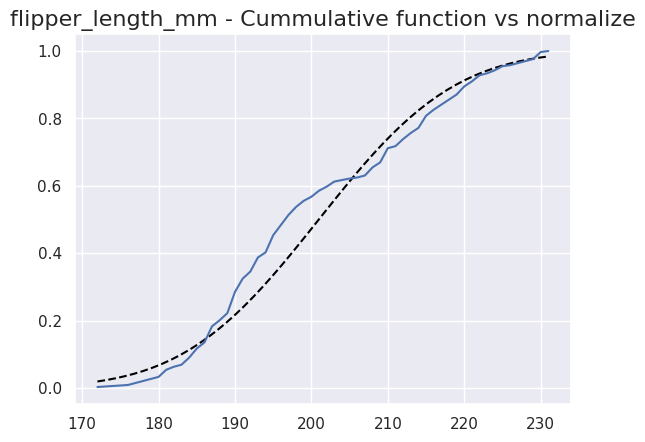

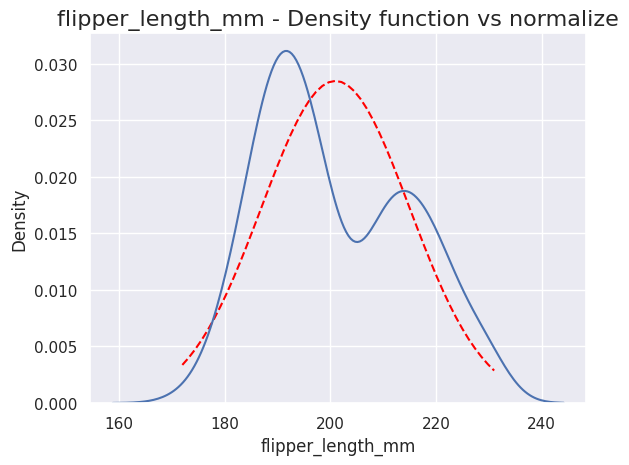

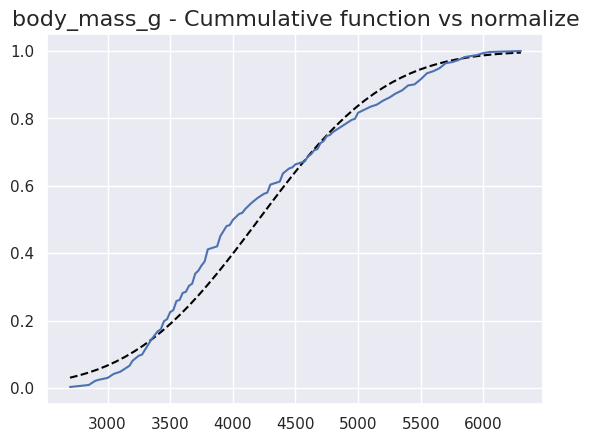

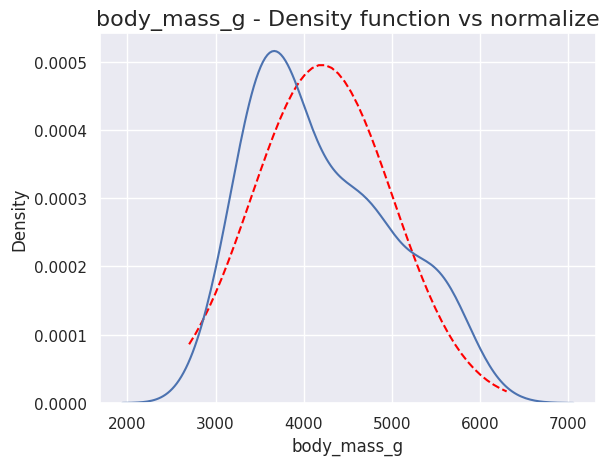

In [174]:
for column in numeric_columns:
    stats = df[column].describe()
    xs = np.linspace(stats['min'],stats['max'])
    ys= scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
    zs= scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
    
    
    plt.plot(xs,ys,color='black',linestyle='dashed')
    empiricaldist.Cdf.from_seq(
        df[column],
        normalize=True
    ).plot()
    plt.title(f'{column} - Cummulative function vs normalize',fontsize=Title_fontsize)
    plt.show()
    
    plt.plot(xs,zs,color='red',linestyle='dashed')

    sns.kdeplot(
        data=df,
        x=column
    )

    plt.title(f'{column} - Density function vs normalize',fontsize=Title_fontsize)
    plt.show()


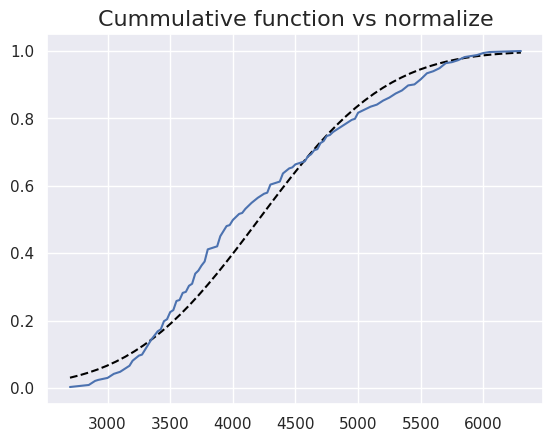

In [175]:
xs = np.linspace(stats['min'],stats['max'])
ys= scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')
empiricaldist.Cdf.from_seq(
    df.body_mass_g,
    normalize=True
).plot()
plt.title('Cummulative function vs normalize',fontsize=Title_fontsize)
plt.show()


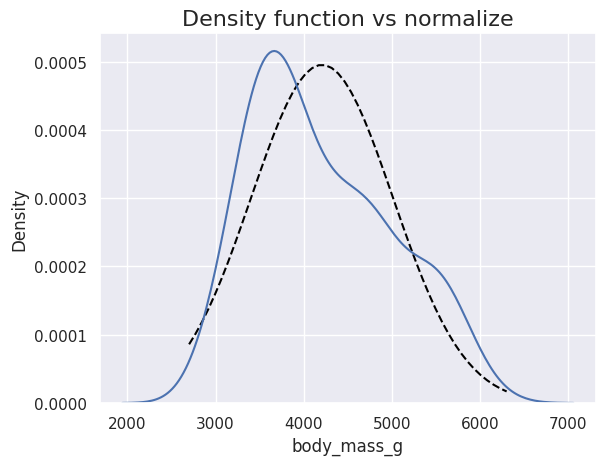

In [176]:
xs = np.linspace(stats['min'],stats['max'])
ys= scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(
    data=df,
    x='body_mass_g'
)

plt.title('Density function vs normalize',fontsize=Title_fontsize)
plt.show()

In [177]:
# Filtros

adelie_df = df.query("species == 'Adelie'")
gentoo_df = df.query("species == 'Gentoo'")
chinstrap_df = df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('year')


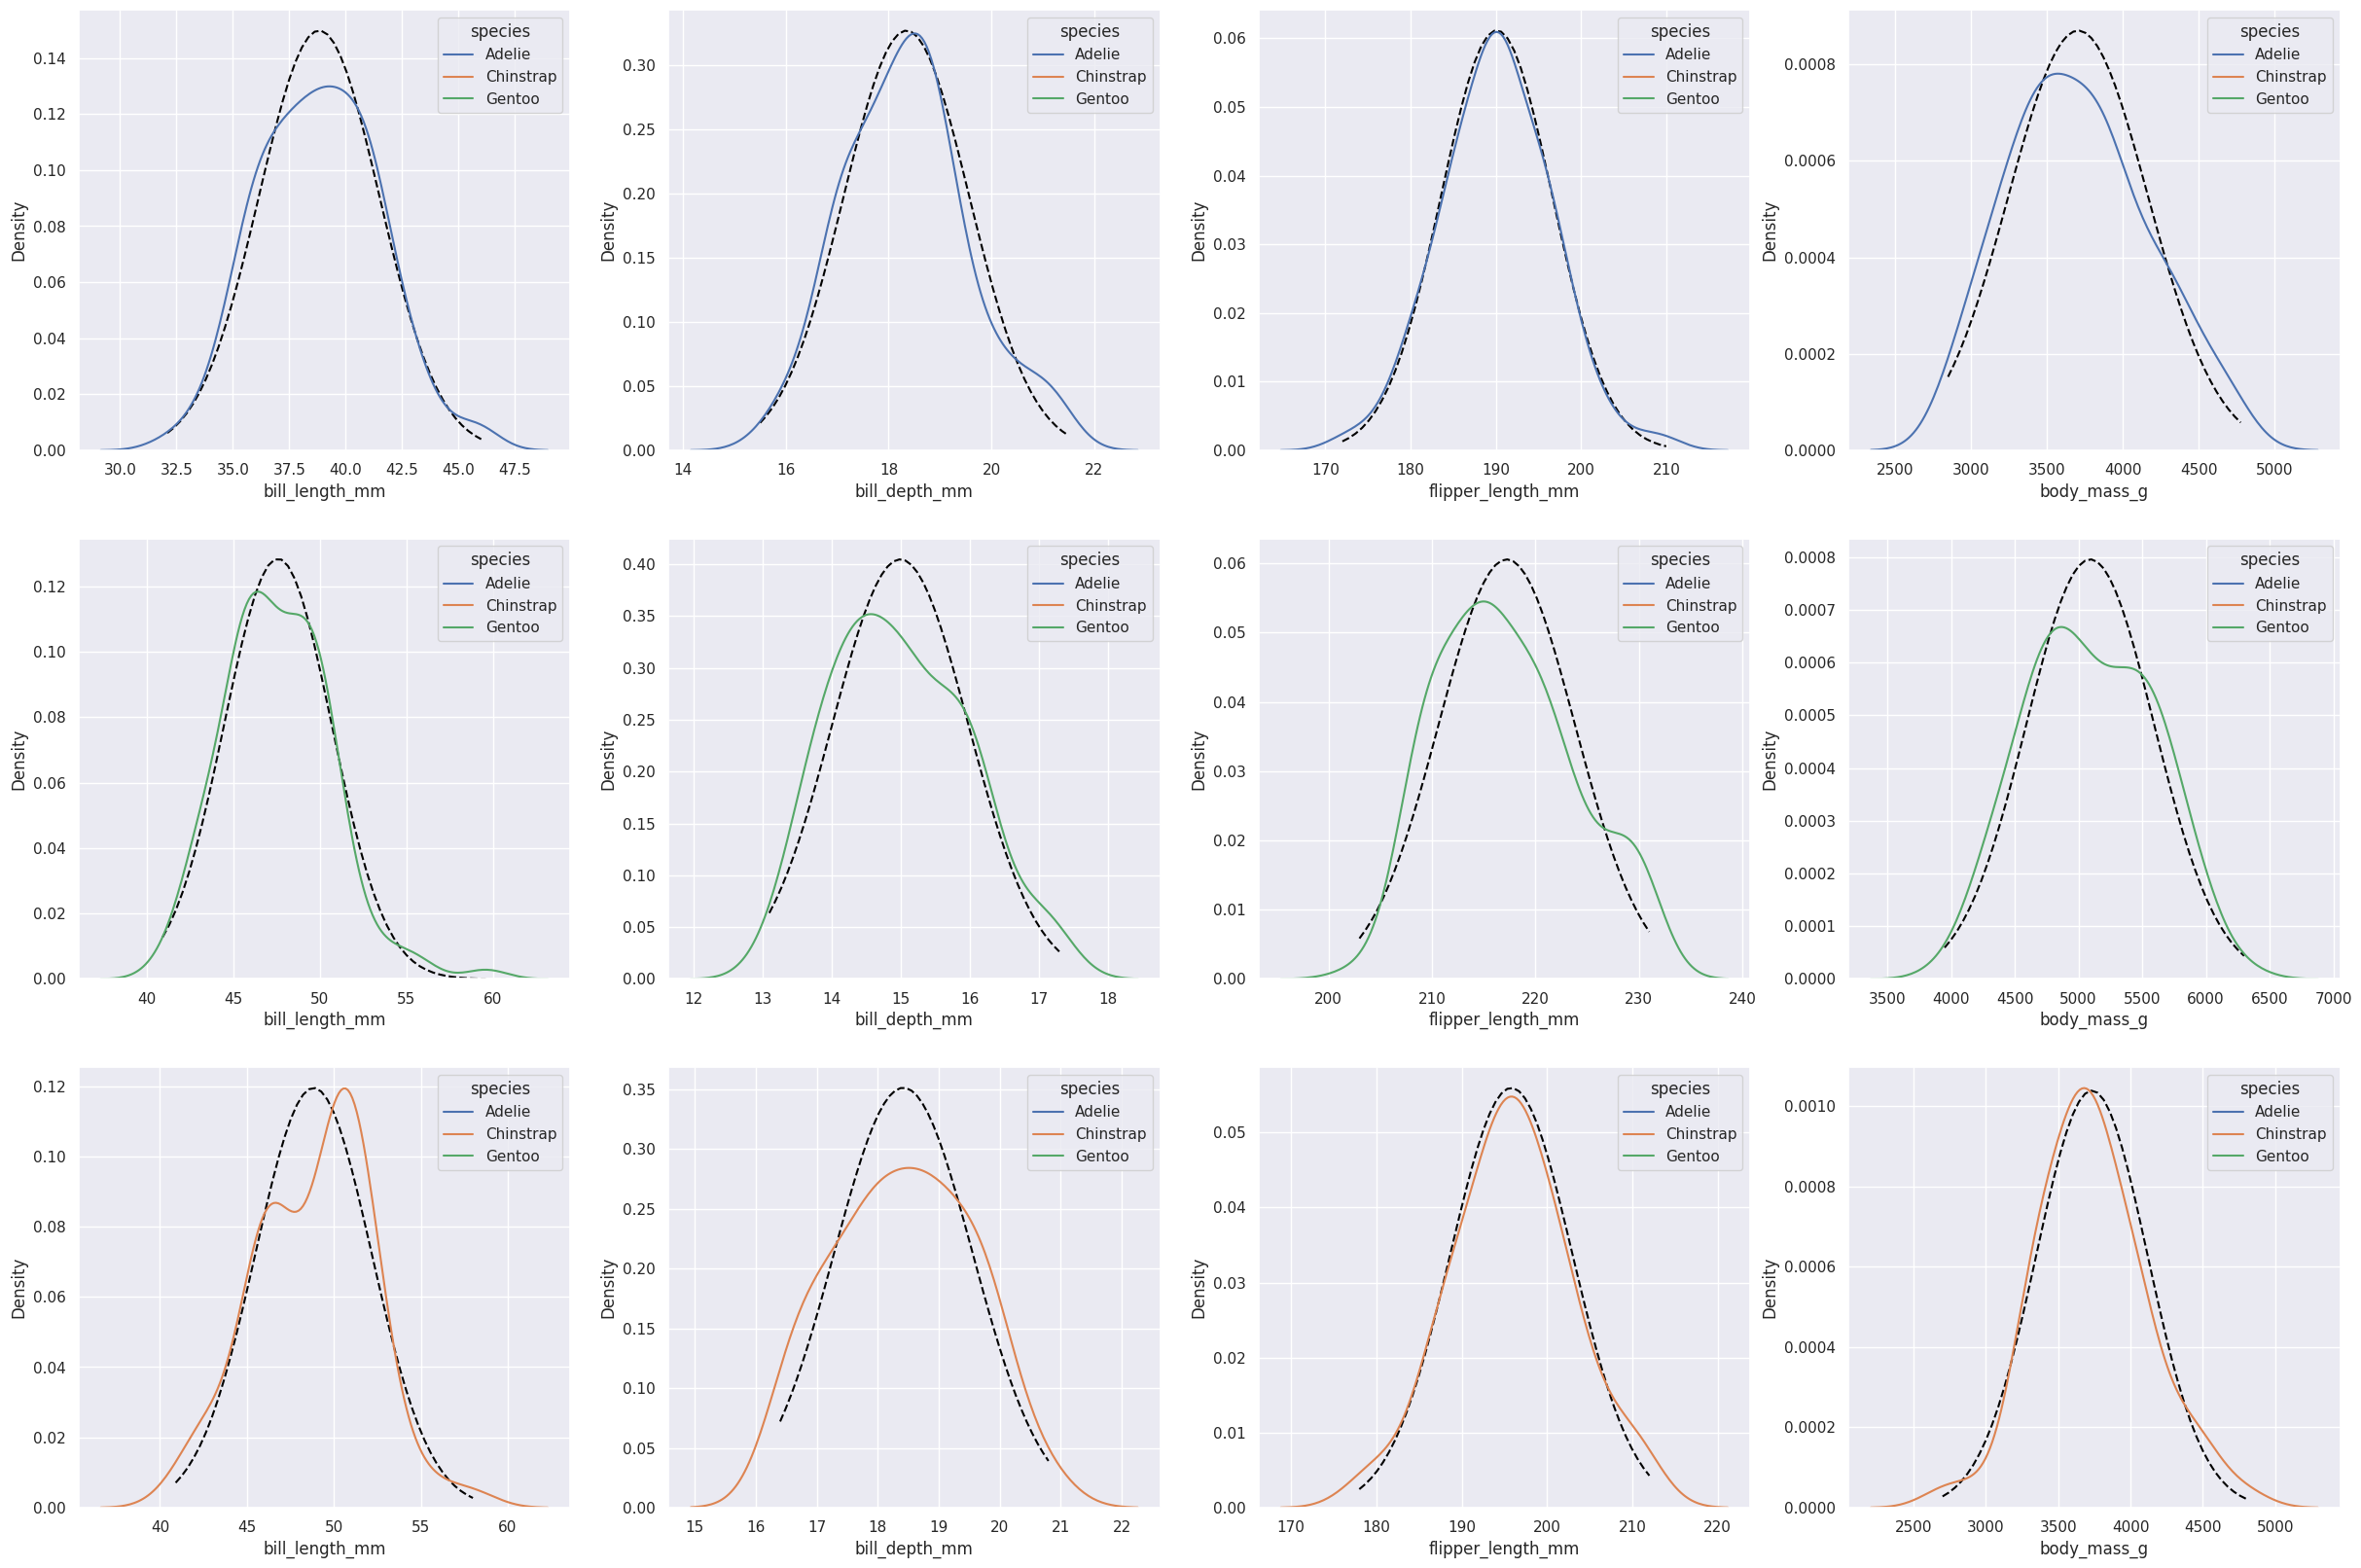

In [178]:
# Grafica

fig, ax = plt.subplots(3,4,figsize=(30,20))
for i, i_col in enumerate(specie):
    for j, j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.kdeplot(
            ax = ax[i][j],
            data = i_col,
            x=j_col,
            hue='species'
        ) 

In [179]:
df.sex.value_counts(normalize=True)

male     0.50
female   0.50
Name: sex, dtype: float64

# Bivariate analysis

## Relationship between variables

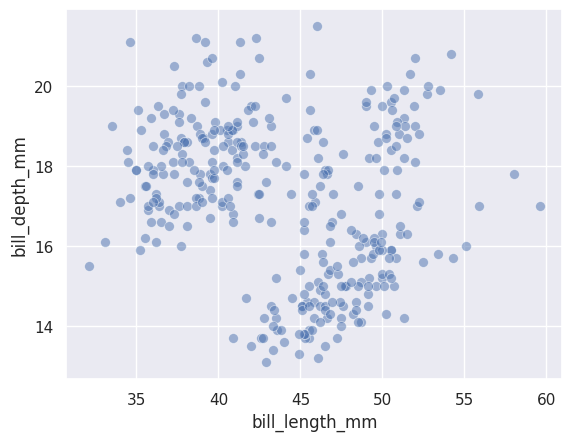

In [180]:
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=50
    )
plt.show()

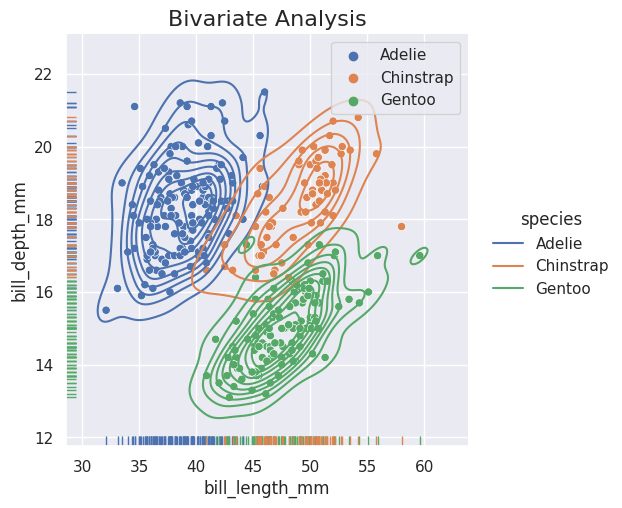

In [181]:
ax = sns.displot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

ax=sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1,
    hue='species'
    )
plt.title('Bivariate Analysis',fontsize=Title_fontsize)
plt.legend()
plt.show()

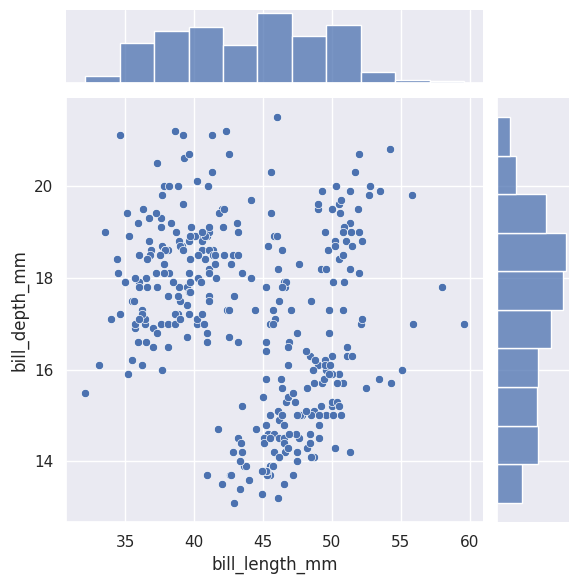

In [182]:
sns.jointplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
plt.show()


## Relationship between variables: categorical vs numeric

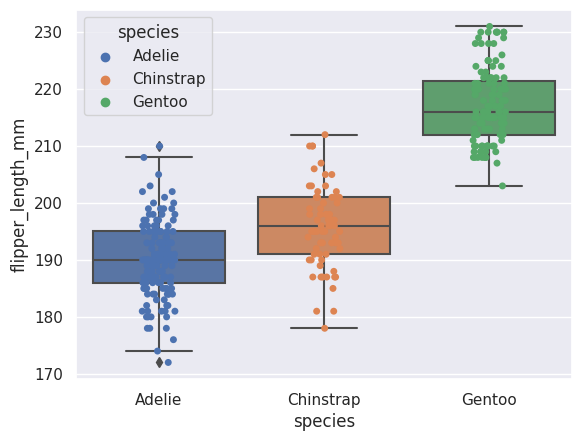

In [183]:
ax = sns.boxplot(
    data=df,
    y='flipper_length_mm',
    x='species'
)

ax =  sns.stripplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    hue='species'
)

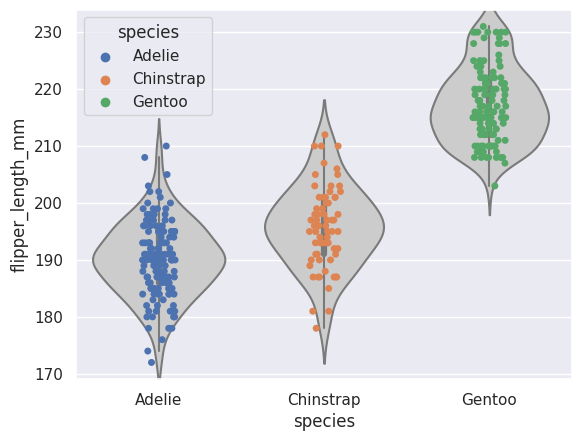

In [184]:
ax = sns.violinplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    color='0.8'
)

ax =  sns.stripplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    hue='species'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

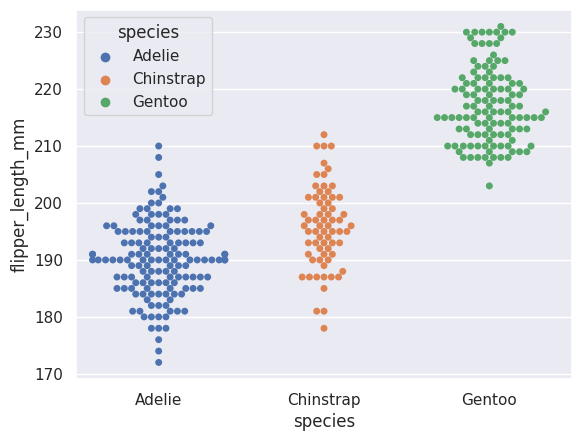

In [185]:
sns.swarmplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    hue= 'species'
)

## Realtionship bwtewwn variables: Correlation

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

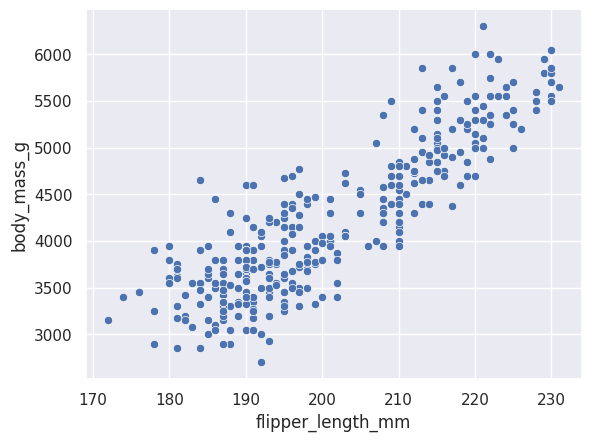

In [186]:
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g'
)

### Coeficiente de Correlación de Pearson:
 Cuantifica la intensidad de la realción lineal entre 2 varaibles en un análisis de correlación.
 
 
 Imp: Correlación no implica causalidad!!!

In [187]:
df.corr().style.highlight_between(left=0.65, right=.99,color='green')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot: >

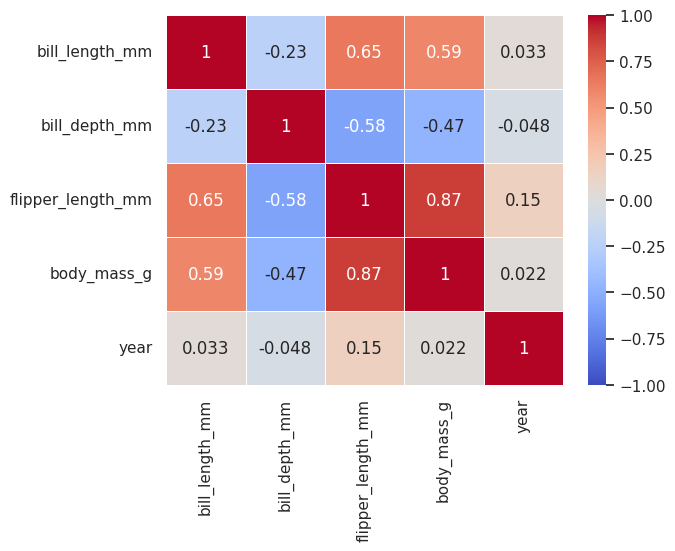

In [188]:
sns.heatmap(
    data=df.corr(),
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

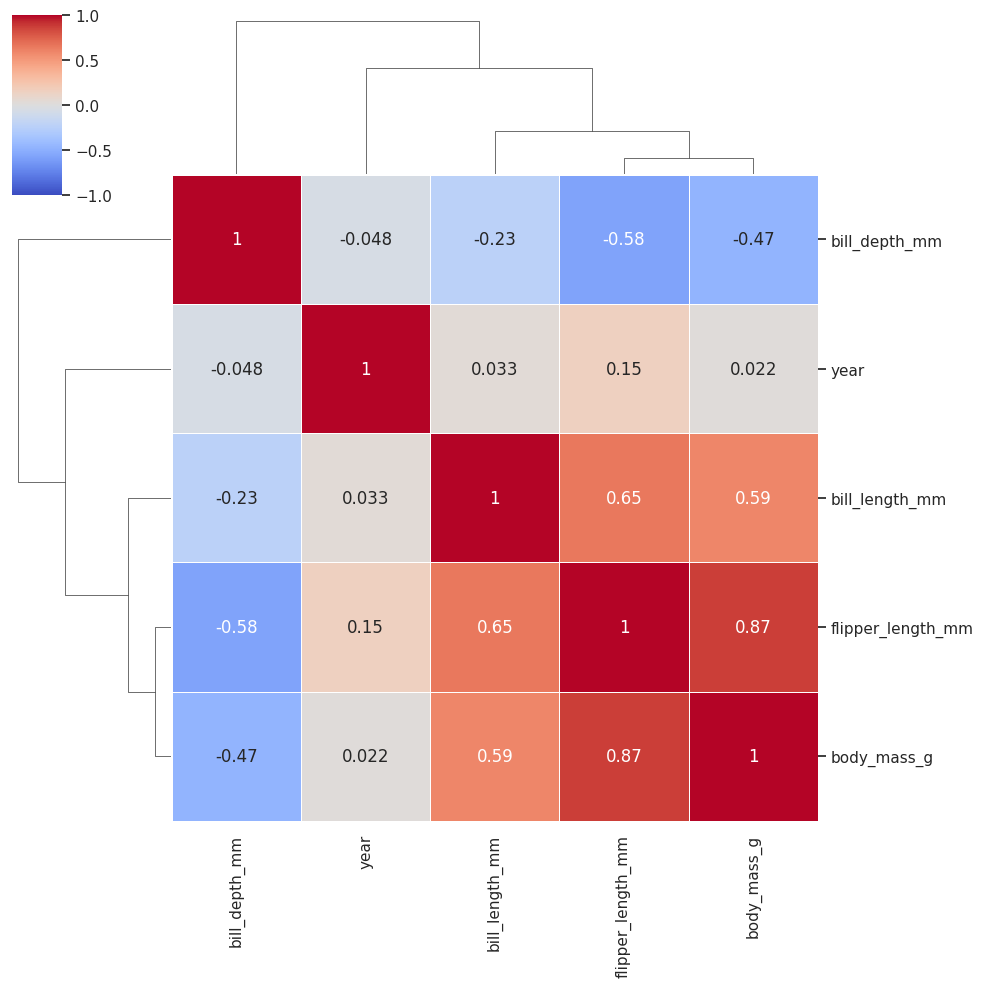

In [189]:
sns.clustermap(
    data=df.corr(),
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

In [190]:
df_num_sex=(
    df.
    assign(
        numeric_sex=lambda df:df.sex.replace(['female','male'],[0,1])
    )
)

In [191]:
df_num_sex['numeric_sex']=df_num_sex['numeric_sex'].astype('int')

<AxesSubplot: >

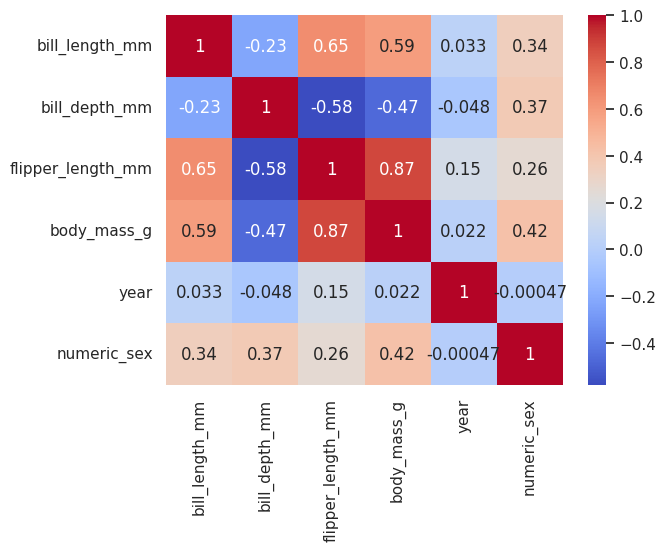

In [192]:
sns.heatmap(
    df_num_sex.corr(),
    annot= True,
    cmap='coolwarm'
)

## Regresión Simple
Para establecer la fuerza de la correlación

In [193]:
reg1=scipy.stats.linregress(
    x=df.bill_length_mm,
    y=df.bill_depth_mm
)
reg2=scipy.stats.linregress(
    x=df.flipper_length_mm,
    y=df.body_mass_g
)
print(reg1,reg2,sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)


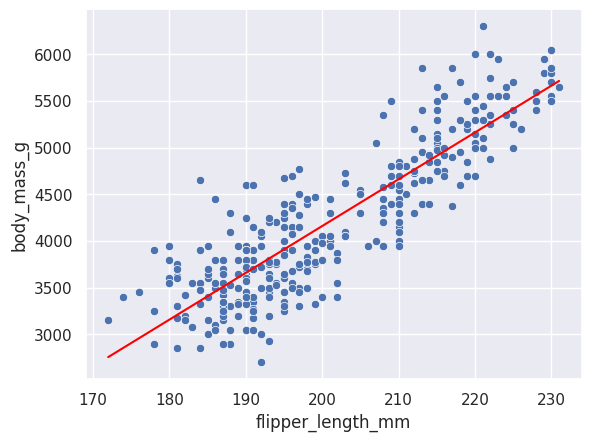

In [194]:
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g'
)

fx2=np.array([df['flipper_length_mm'].min(),df['flipper_length_mm'].max()])
fy2= reg2.intercept + reg2.slope * fx2
plt.plot(fx2,fy2,color='red')
plt.show()

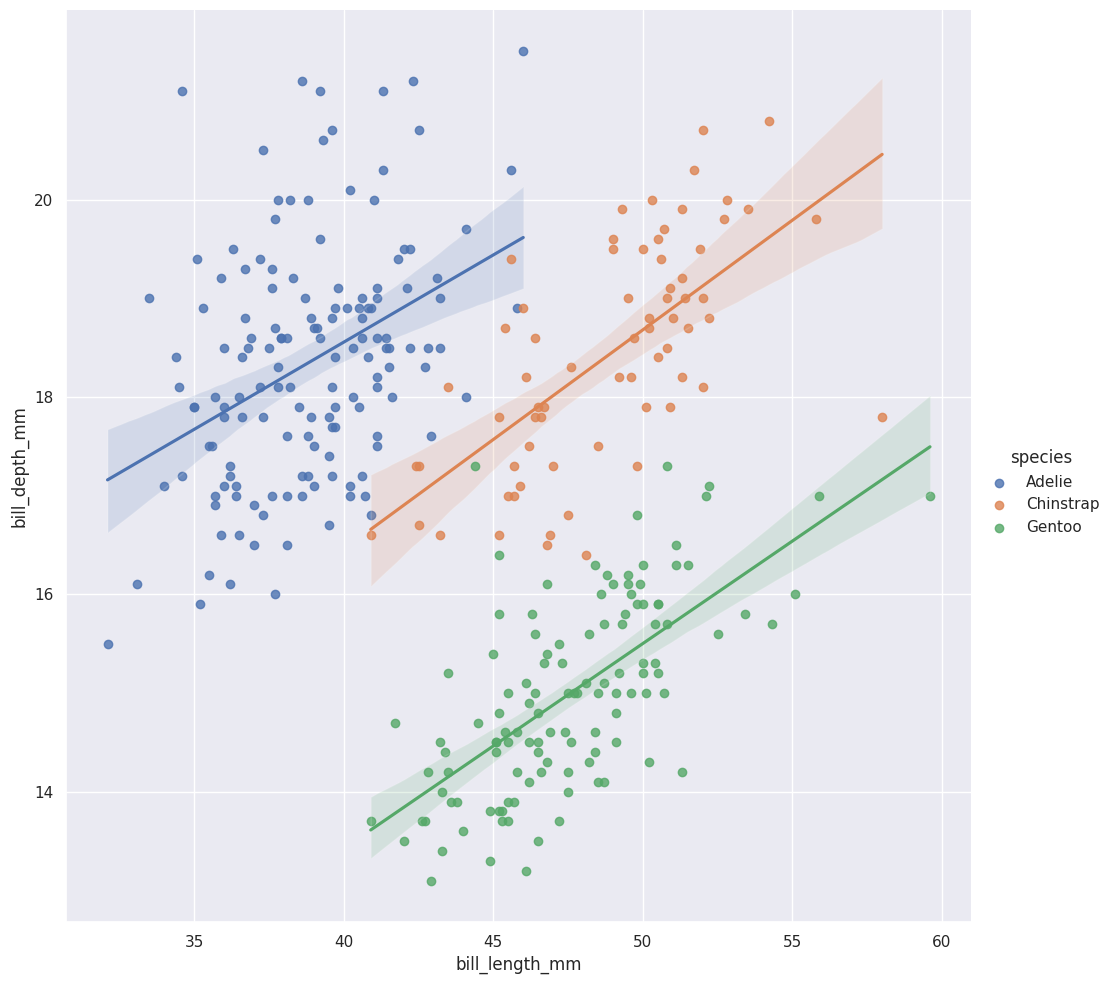

In [195]:
sns.lmplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

In [196]:
x = df.bill_length_mm
y = df.bill_depth_mm

reg1 = scipy.stats.linregress(x=x,y=y)
reg2 = scipy.stats.linregress(x=y,y=x)

print(reg1,reg2,sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


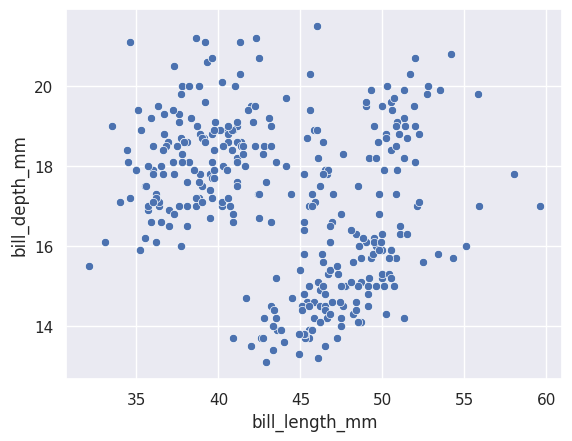

In [197]:
sns.scatterplot(
    data=df,
    x=x,
    y=y
)

fx1=np.array(x.min(),x.max())
fy1= reg1.intercept + reg1.slope * fx1
plt.plot(fx1,fy1,color='red')
plt.show()

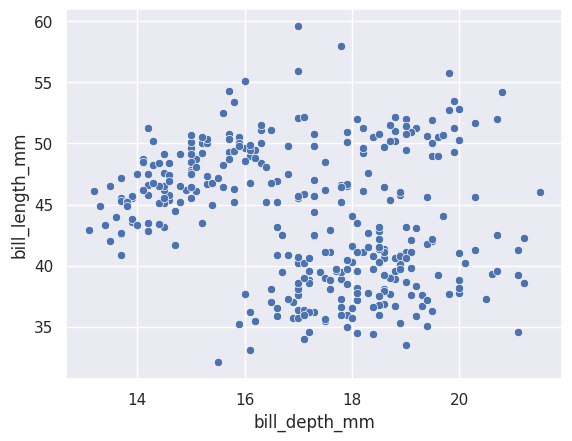

In [198]:
sns.scatterplot(
    data=df,
    x=y,
    y=x
)

fx1=np.array(y.min(),y.max())
fy1= reg2.intercept + reg2.slope * fx1
plt.plot(fx1,fy1,color='red')
plt.show()

In [199]:
x = df.flipper_length_mm
y = df.body_mass_g

reg1 = scipy.stats.linregress(x=x,y=y)
reg2 = scipy.stats.linregress(x=y,y=x)

print(reg1,reg2,sep='\n')

LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)
LinregressResult(slope=0.015195264815217668, intercept=137.03962089225467, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243143)


# Multiple Regression Analysis

In [200]:
import statsmodels.formula.api as smf

In [201]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=df
    ).fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.54e-32
Time:                        16:52:00   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=df
    ).fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           7.04e-46
Time:                        16:52:00   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=df
    ).fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          9.26e-103
Time:                        16:52:01   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=df
    ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          6.28e-122
Time:                        16:52:01   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### But, sometimes less is better...

In [205]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm',
        data=df
    ).fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.13e-105
Time:                        16:52:01   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizing Results

Which model adjust better to our data

### Table with results

In [206]:
model_results=pd.DataFrame(
    dict(
        actual_value = df.body_mass_g,
        predict_value1 = model_1.predict(),
        predict_value2 = model_2.predict(),
        predict_value3 = model_3.predict(),
        predict_value4 = model_4.predict(),
        predict_value5 = model_5.predict(),
        species = df.species,
        sex = df.sex
    )
)
model_results

,actual_value,predict_value1,predict_value2,predict_value3,predict_value4,predict_value5,species,sex
0,3750.00,3782.40,3617.64,3204.76,3579.14,3205.65,Adelie,male
1,3800.00,3817.12,3836.73,3436.70,3343.22,3456.41,Adelie,female
2,3250.00,3886.55,3809.27,3906.90,3639.14,3907.79,Adelie,female
4,3450.00,3574.10,3350.79,3816.71,3457.95,3807.49,Adelie,female
5,3650.00,3799.76,3356.14,3696.17,3764.54,3657.03,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.00,5231.83,4706.95,4599.19,4455.02,4509.63,Chinstrap,male
340,3400.00,4164.29,4034.12,4274.55,3894.86,4258.87,Chinstrap,female
341,3775.00,4693.72,4475.93,3839.56,4063.64,3807.49,Chinstrap,male
342,4100.00,4797.87,4449.30,4720.74,4652.01,4660.09,Chinstrap,male


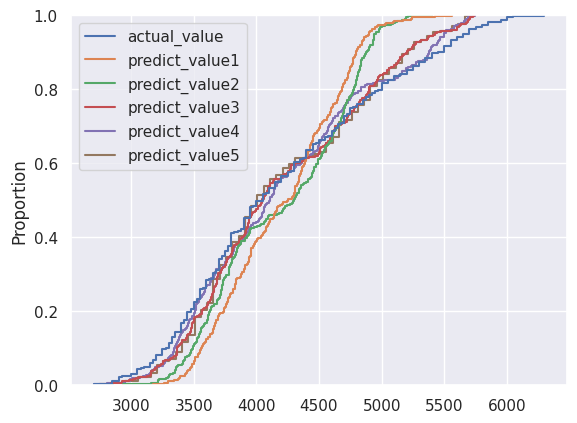

In [207]:
sns.ecdfplot(
    data=model_results,
    
)
plt.show()

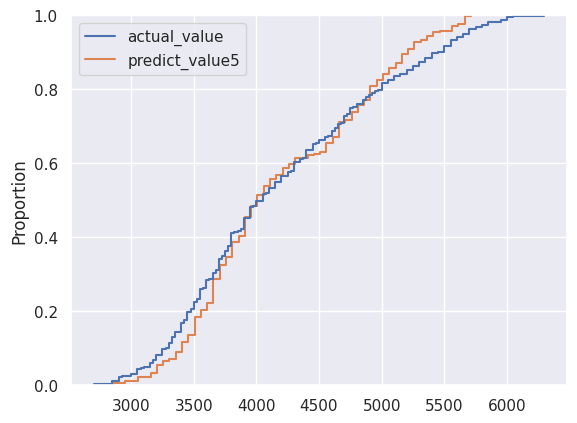

In [208]:
sns.ecdfplot(
    data=model_results[['actual_value','predict_value5']],
    
)
plt.show()

### PDF's

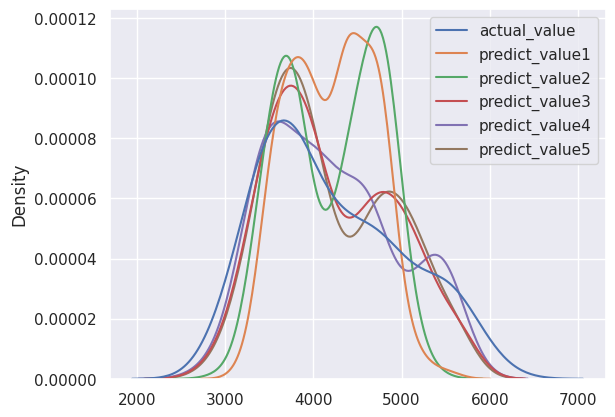

In [209]:
sns.kdeplot(
    data=model_results
)
plt.show()

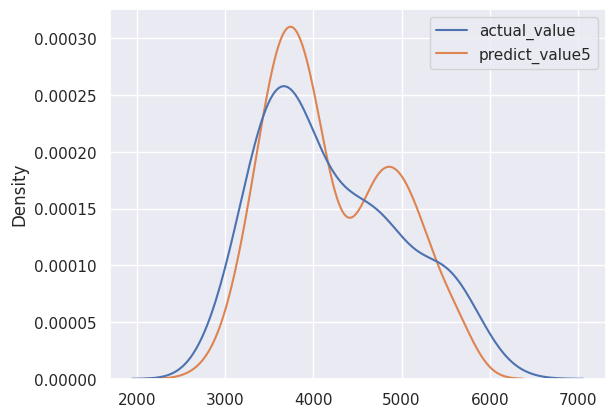

In [210]:
sns.kdeplot(
    data=model_results[['actual_value','predict_value5']]
)
plt.show()

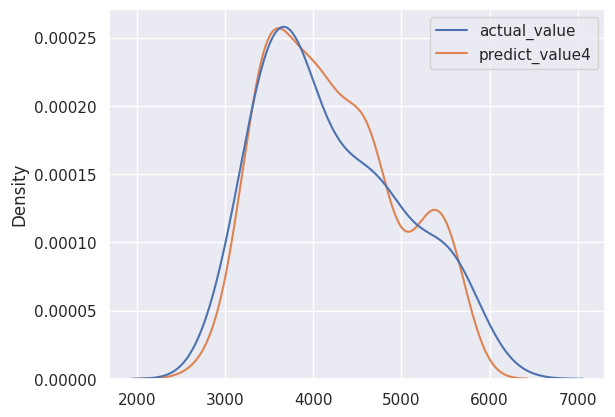

In [211]:
sns.kdeplot(
    data=model_results[['actual_value','predict_value4']]
)
plt.show()

### What should be looking at before creating the models?

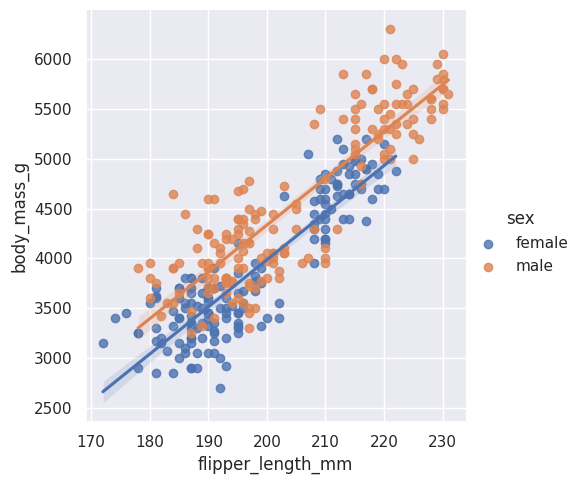

In [212]:
sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex'
)

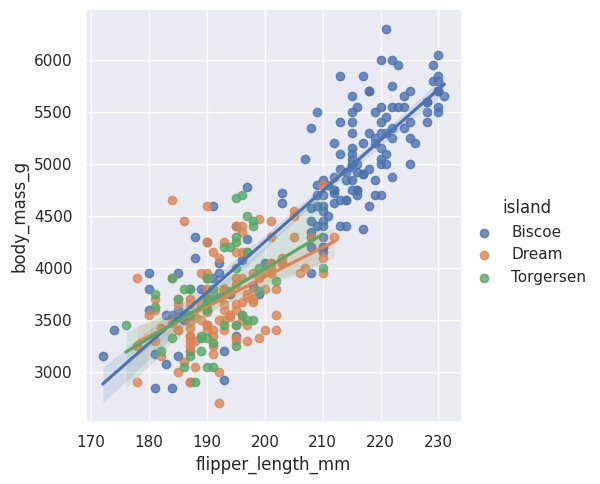

In [213]:
sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='island'
)

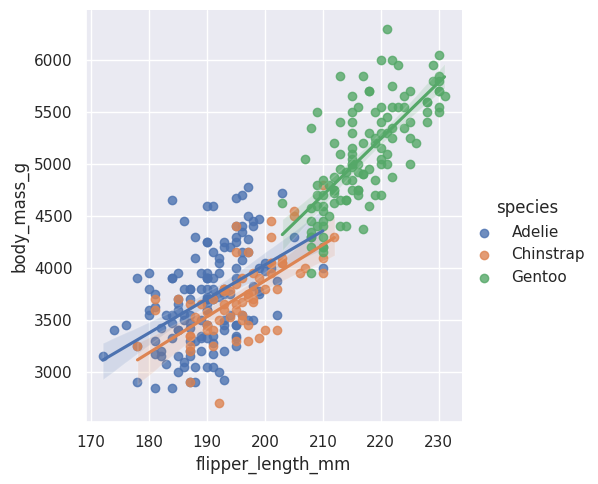

In [214]:
sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species'
)

### Con esta nueva infomación, creamos un nuevo modelo

In [215]:
model_6 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex) + C(species)',
        data=df
    ).fit()
)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.37e-142
Time:                        16:52:05   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

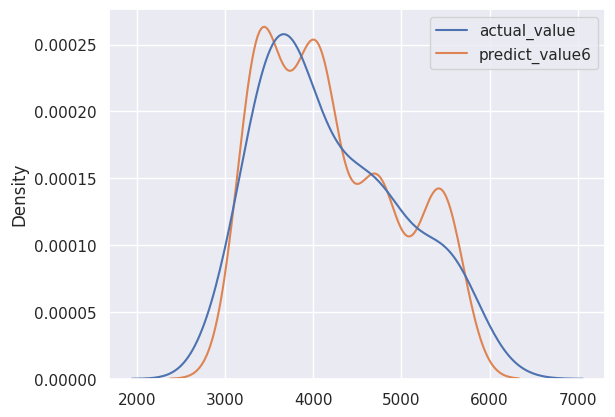

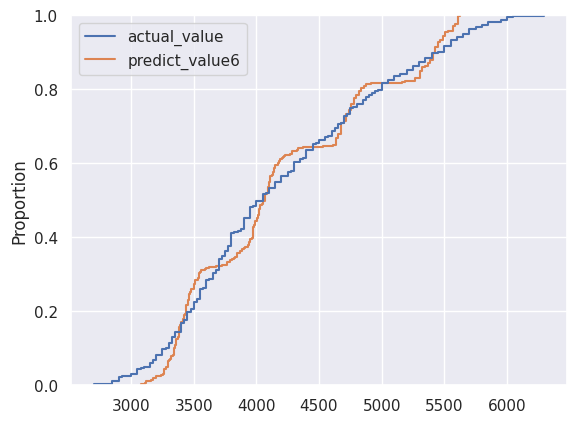

In [216]:
model_results2=pd.DataFrame(
    dict(
        actual_value = df.body_mass_g,
        predict_value6 = model_6.predict(),
    )
)

sns.kdeplot(
    data=model_results2
)
plt.show()

sns.ecdfplot(
    data=model_results2,
    
)
plt.show()

### Regresión Logística

In [241]:
df['numeric_sex']=df['sex'].map({
    'male':1,
    'female':0
}).astype('int')

In [245]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                  0.4793
Time:                        17:04:22   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [248]:
df.value_counts(['island','sex']).reset_index(name='count')

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


### Create a model to help as to identify is a penguin belong to an specific specie 

In [249]:
df.species.unique()

['Adelie', 'Gentoo', 'Chinstrap']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [254]:
df['species_gentoo'] = df['species'].map({
        'Adelie':1,
         'Gentoo':0, 
         'Chinstrap':0    
})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,species_gentoo
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007,1,1
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007,0,1
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007,0,1
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007,0,1
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,male,2007,1,1


In [256]:
model_gentoo=smf.logit(
    formula='species_gentoo ~ flipper_length_mm + C(sex)',
    data=df
).fit()
model_gentoo.summary()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         species_gentoo   No. Observations:                  333
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                  0.4818
Time:                        19:45:07   Log-Likelihood:                -118.29
converged:                       True   LL-Null:                       -228.29
Covariance Type:            nonrobust   LLR p-value:                 1.693e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            40.5684      4.669      8.689      0.000      31.418      49.719
C(sex)[T.male]        1.2827      0.356      3.601      0.000       0.585       1.981
flipper_length_mm    -0.2097      0.024     -8.635      0.000      -0.257      -0.162
=====================================================================================
"""

In [257]:
model_gentoo.params

Intercept           40.57
C(sex)[T.male]       1.28
flipper_length_mm   -0.21
dtype: float64

In [258]:
is_gentoo_df = pd.DataFrame(
    dict(
        actual_gentoo = df.species_gentoo,
        prediction = model_gentoo.predict().round()
    )
)
is_gentoo_df

In [263]:
is_gentoo_df.value_counts(['actual_gentoo','prediction']).reset_index(name='count')

,actual_gentoo,prediction,count
0,0,0.00,151
1,1,1.00,129
2,0,1.00,36
3,1,0.00,17
